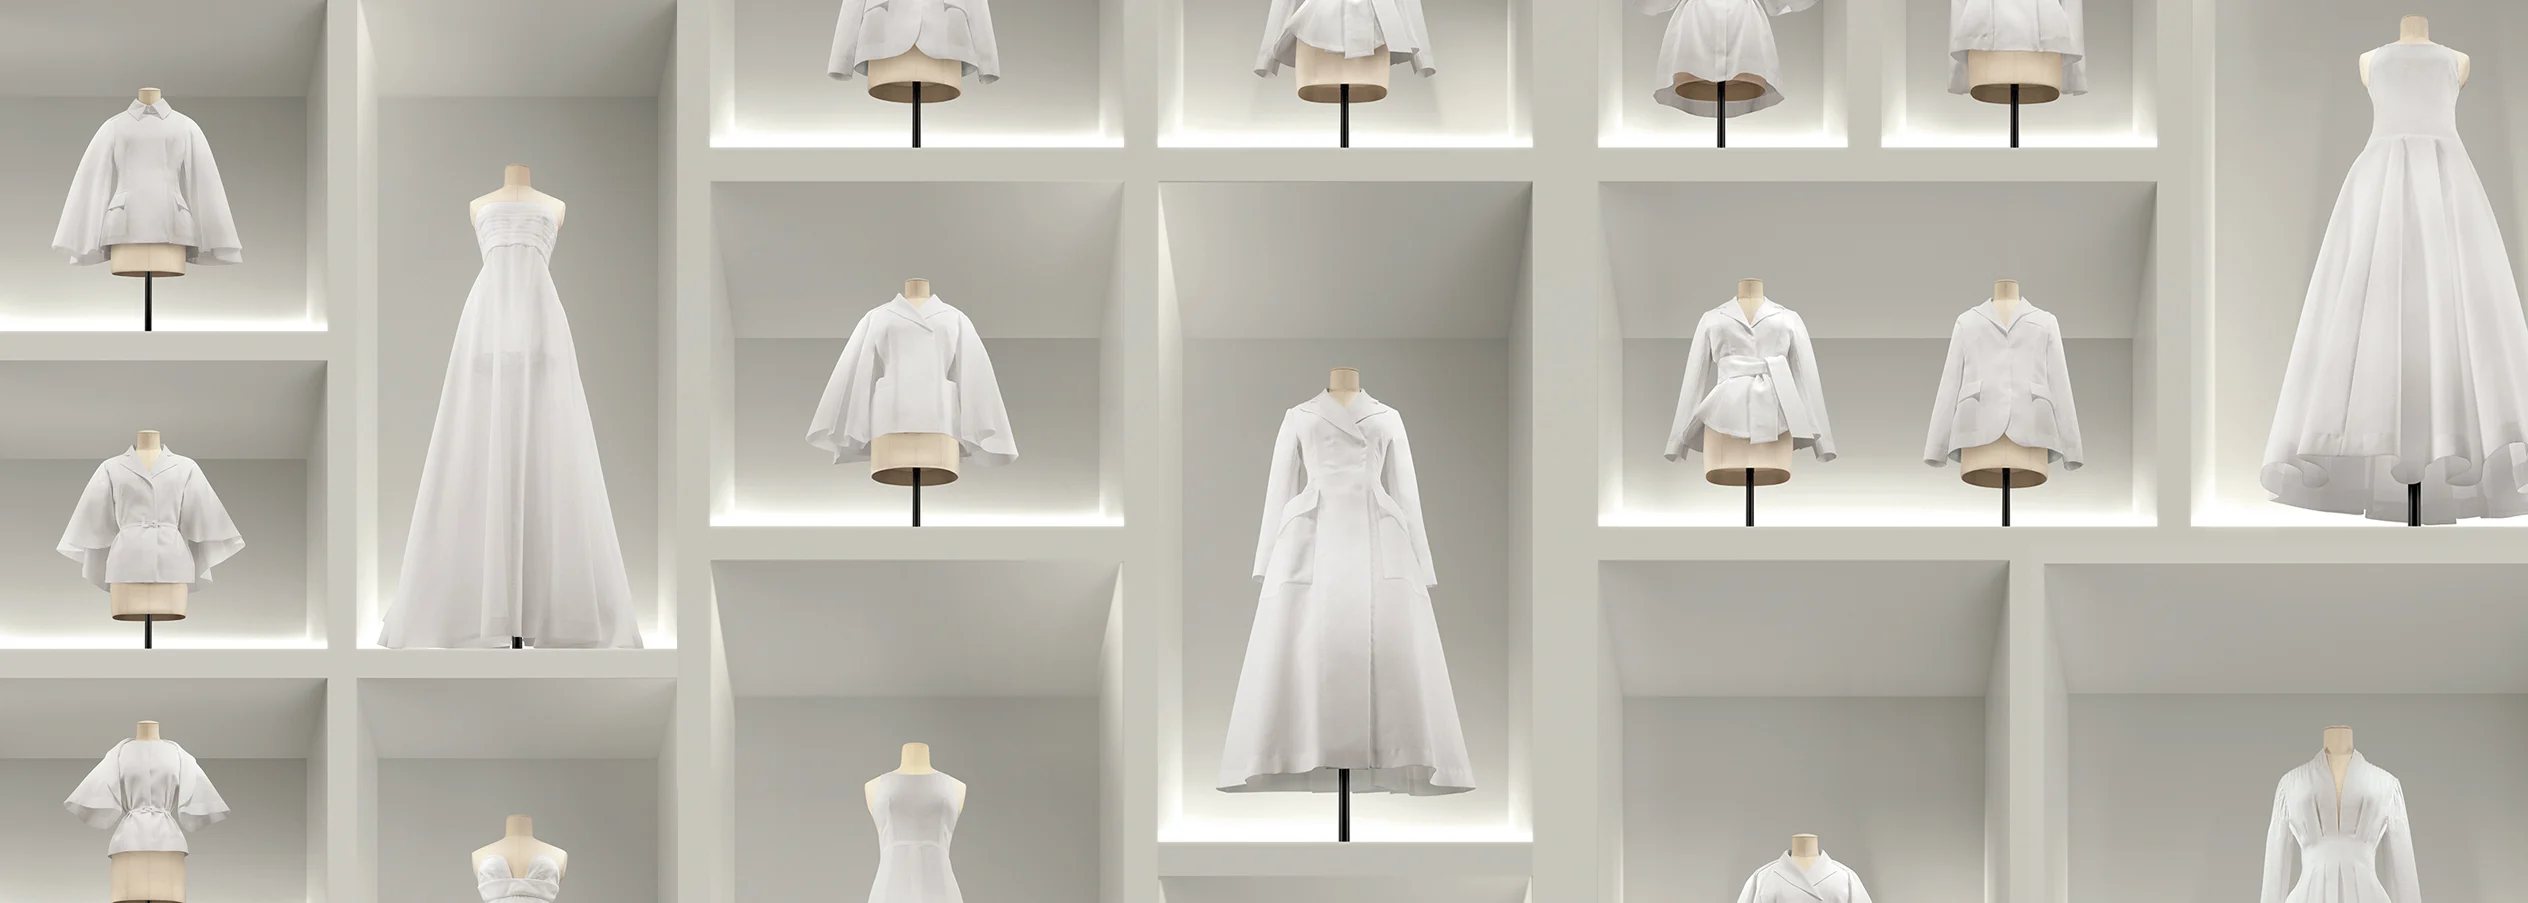
# Projet Apprentissage Artificiel - Prix des Produits Dior en Chine

## 1) Phase analyse exploratoire (EDA)

### Dataset

https://huggingface.co/datasets/DBQ/Dior.Product.prices.China

### Objectifs
Dans cette phase, nous allons explorer et analyser les données des produits Dior disponibles sur le marché chinois afin de mieux comprendre leur structure et leur distribution de prix.

1. **Chargement du dataset** : Récupérer les données depuis Hugging Face et les convertir.

2. **Observation des données** : Examiner les colonnes disponibles, les types de données et vérifier la présence de valeurs manquantes.

3. **Statistiques descriptives** : Calculer des statistiques de base pour comprendre la distribution des prix, comme le minimum, le maximum, la moyenne, la médiane et l’écart-type.

4. **Visualisations graphiques** : 
   - Histogrammes pour observer la distribution des prix.
   - Boxplots pour détecter les valeurs extrêmes et outliers.
   - Scatterplots pour analyser les relations potentielles entre les variables numériques et le prix.

5. **Analyse des corrélations** : Identifier les relations entre les différentes features et le prix afin de mettre en évidence des facteurs potentiellement influents sur le pricing des produits.

Cette étape permettra de dégager des insights préliminaires et de préparer les données pour la phase de modélisation.

In [1]:
# ID

nom = "Makoundou"
prenom = "Nsonde Chloe"
stud_numb = ""

print(nom)
print(prenom)

Makoundou
Nsonde Chloe


In [2]:
# Installation

# !pip install jieba
# !pip install pypinyin

In [57]:
# bibliotheques
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("../src"))
from load_data import load_dior
from utils_eda import check_unique_values
from preprocessing import preprocess_dior


In [4]:
# chargement du dataset

df = load_dior()
df.head()

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
0,Dior,2023-11-17,CHI,CNY,DIOR,WOMEN,SMALL LEATHER GOODS,MINI BAGS,S5106UWHC_M030_TU,Dior Caro 链条手袋,https://www.dior.com/zh_cn/fashion/products/S5...,https://media.dior.cn/couture/ecommerce/media/...,16800.0,16800.0,2135.77,2135.77,0
1,Dior,2023-11-17,CHI,CNY,DIOR,WOMEN,SMALL LEATHER GOODS,POUCHES,M2265PMRZ_M096_TU,Dior Or Minaudière 手袋,https://www.dior.com/zh_cn/fashion/products/M2...,https://media.dior.cn/couture/ecommerce/media/...,78000.0,78000.0,9916.09,9916.09,0
2,Dior,2023-11-17,CHI,CNY,DIOR,WOMEN,MAISON,DECORATIVE PIECES,HYR02FBB0U_C900_TU,DIOR X STARCK 联名系列 Miss Dior 勋章椅,https://www.dior.com/zh_cn/fashion/products/HY...,https://media.dior.cn/couture/ecommerce/media/...,29500.0,29500.0,3750.31,3750.31,0
3,Dior,2023-11-17,CHI,CNY,DIOR,WOMEN,HANDBAGS,HANDBAGS,M0565OFAK_M900_TU,中号 Lady Dior 手袋,https://www.dior.com/zh_cn/fashion/products/M0...,https://media.dior.cn/couture/ecommerce/media/...,62000.0,62000.0,7882.02,7882.02,0
4,Dior,2023-11-17,CHI,CNY,DIOR,TIMEPIECES,EXCEPTIONAL TIMEPIECES,DIOR GRANDBAL,CD153BI0A001_0000_U,Dior Grand Bal Dentelle Frivole 腕表,https://www.dior.com/zh_cn/fashion/products/CD...,https://media.dior.cn/couture/ecommerce/media/...,690000.0,690000.0,87719.29,87719.29,0


In [5]:
df.info()
# df.describe(include="all")
df.describe(include=["float64", "int64"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   website_name     4499 non-null   object 
 1   competence_date  4499 non-null   object 
 2   country_code     4499 non-null   object 
 3   currency_code    4499 non-null   object 
 4   brand            4499 non-null   object 
 5   category1_code   4499 non-null   object 
 6   category2_code   4499 non-null   object 
 7   category3_code   4498 non-null   object 
 8   product_code     4499 non-null   object 
 9   title            4499 non-null   object 
 10  itemurl          4499 non-null   object 
 11  imageurl         4499 non-null   object 
 12  full_price       4499 non-null   float64
 13  price            4499 non-null   float64
 14  full_price_eur   4499 non-null   float64
 15  price_eur        4499 non-null   float64
 16  flg_discount     4499 non-null   int64  
dtypes: float64(4),

,full_price,price,full_price_eur,price_eur,flg_discount
count,4.499000e+03,4.499000e+03,4499.000000,4499.000000,4499.0
mean,4.580741e+04,4.580741e+04,5823.464425,5823.464425,0.0
std,2.166139e+05,2.166139e+05,27538.001638,27538.001638,0.0
min,4.700000e+02,4.700000e+02,59.750000,59.750000,0.0
25%,3.800000e+03,3.800000e+03,483.090000,483.090000,0.0
50%,8.200000e+03,8.200000e+03,1042.460000,1042.460000,0.0
75%,2.350000e+04,2.350000e+04,2987.540000,2987.540000,0.0
max,3.100000e+06,3.100000e+06,394101.190000,394101.190000,0.0


In [6]:
df.describe(include=["object"])

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl
count,4499,4499,4499,4499,4499,4499,4499,4498,4499,4499,4499,4499
unique,1,1,1,1,1,5,17,118,4499,1570,4499,4499
top,Dior,2023-11-17,CHI,CNY,DIOR,WOMEN,CLOTHING,HANDBAGS,S5106UWHC_M030_TU,Dior Tribales 耳环,https://www.dior.com/zh_cn/fashion/products/S5...,https://media.dior.cn/couture/ecommerce/media/...
freq,4499,4499,4499,4499,4499,2707,700,332,1,51,1,1


#### Observations des données

- `website_name`, objet : site de e-commerce source
- `competence_date`, objet : date de collecte à convertir en datetime plus tard
- `country_code`, objet : le code du pays en l'occurence la Chine
- `currency_code`, objet : devise
- `brand, objet` : Dior qui est une valeur unique (surement inutile plus tard)
- `category1_code`, objet : la catégorie générale
- `category2_code`, objet : sous-categorie
- `category3_code`, objet : sous-sous-category
- `product_code`, objet : id du produit
- `title`, objet : le nom textuel du produit
- `itemurl`, objet: l'url de l'article, pas utile
- `imageurl`, objet : pas utile
- `full_price`, float64 : prix de base avant remise
- `price`, float64 : prix payé
- `full_price_eur`, float64 : prix convertis en EUR
- `price_eur`, float64 : prix payés convertis en EUR
- `flg_discount`, int : drapeau de discount 1 remise et 0 prix normal




**les colonnes sur lesquels on va travailler sure** :

`price`-> TARGET, `full_price`, `title`, `category1_code, category2_code, category3_code`

**Ceux à vérifier** :
`currency_code`, `competence_date`, `product_code`, `country_code`, `flg_discount`

In [7]:
# Faire une fonction pour verifier if is unique
check_unique_values(df)

Nombre de valeurs uniques par colonne:

website_name         -> 1 valeurs uniques
competence_date      -> 1 valeurs uniques
country_code         -> 1 valeurs uniques
currency_code        -> 1 valeurs uniques
brand                -> 1 valeurs uniques
category1_code       -> 5 valeurs uniques
category2_code       -> 17 valeurs uniques
category3_code       -> 118 valeurs uniques
product_code         -> 4499 valeurs uniques
title                -> 1570 valeurs uniques
itemurl              -> 4499 valeurs uniques
imageurl             -> 4499 valeurs uniques
full_price           -> 463 valeurs uniques
price                -> 463 valeurs uniques
full_price_eur       -> 463 valeurs uniques
price_eur            -> 463 valeurs uniques
flg_discount         -> 1 valeurs uniques


**Colonnes à enlevé** :

- `website_name`
- `competence_date`
- `country_code`
- `currency_code`
- `brand`
- `flg_discount`

**remarques** : Il y a des colonnes suspectes

full_price et price et la version en eur on le même nombre de valeurs uniques. On doit se pencher dessus

In [8]:
print((df['full_price'] == df['price']).all())
print((df['full_price_eur'] == df['price_eur']).all())


True
True


**remarques** : du coup ca confirme bien que `full_price` et `price` sont égales donc on peux avoir le choix de travailler soit sur `full_price` ou `price` comme **target** 

A noter qu'il y a très rarement, voir jamais de réduction dans le secteur du luxe.Et on pouvait le voir grâce à `flg_discount` qui est une valeur unique en 0.

Du coup pour se simplifier la vie on va utiliser plus `price.`

avoir trop de valeur unique aussi peux être inutile pour notre modèle donc on pourrait potentiellement enlever également `product_code`

**Colonne finale à enlever** :
- `website_name`
- `competence_date`
- `country_code`
- `currency_code`
- `brand`
- `flg_discount`
- `full_price`
- `full_price_eur`
- `product_code`
- `itemurl`
- `imageurl`

**Ce qu'il nous reste** :
- `price`
- `price_eur`
- `category1_code`
- `category2_code`
- `category3_code`
- `title`

In [9]:
# Verification de valeurs manquantes
print("Valeurs manquantes dans le dataset :\n", df.isna().sum())


Valeurs manquantes dans le dataset :
 website_name       0
competence_date    0
country_code       0
currency_code      0
brand              0
category1_code     0
category2_code     0
category3_code     1
product_code       0
title              0
itemurl            0
imageurl           0
full_price         0
price              0
full_price_eur     0
price_eur          0
flg_discount       0
dtype: int64


**remarques** : On remarque que dans `category3_code` il y a une valeur manquante

In [11]:
# On verifie le type de données

print(df.dtypes)
print(df.dtypes)

website_name        object
competence_date     object
country_code        object
currency_code       object
brand               object
category1_code      object
category2_code      object
category3_code      object
product_code        object
title               object
itemurl             object
imageurl            object
full_price         float64
price              float64
full_price_eur     float64
price_eur          float64
flg_discount         int64
dtype: object
website_name        object
competence_date     object
country_code        object
currency_code       object
brand               object
category1_code      object
category2_code      object
category3_code      object
product_code        object
title               object
itemurl             object
imageurl            object
full_price         float64
price              float64
full_price_eur     float64
price_eur          float64
flg_discount         int64
dtype: object


**remarques**

`category1_code`,`category2_code`,`category3_code`,
`title`, ce sont des object
`price`,`price_eur`, ce sont des float64

je remarque également que les titres sont en pinyin ca pourrait nous embêter plus tard si on fait TF-IDF alors j'utilise la romanization :

In [13]:
# verifier la romanization
df[['title']].head(10)


,title
0,Dior Caro 链条手袋
1,Dior Or Minaudière 手袋
2,DIOR X STARCK 联名系列 Miss Dior 勋章椅
3,中号 Lady Dior 手袋
4,Dior Grand Bal Dentelle Frivole 腕表
5,Diortwin 方巾
6,哈灵顿短夹克
7,合身西装
8,竖版钱包
9,Bois de Rose 耳环


On regarde les 10 premières valeurs des features qu'on a gardé

In [21]:
df[['category1_code']].head(10)

,category1_code
0,WOMEN
1,WOMEN
2,WOMEN
3,WOMEN
4,TIMEPIECES
5,WOMEN
6,MEN
7,MEN
8,MEN
9,JEWELLERY


In [22]:
df[['category2_code']].head(10)

,category2_code
0,SMALL LEATHER GOODS
1,SMALL LEATHER GOODS
2,MAISON
3,HANDBAGS
4,EXCEPTIONAL TIMEPIECES
5,ACCESSORIES
6,CLOTHING
7,CLOTHING
8,LEATHER GOODS
9,JEWELLERY


In [23]:
df[['category3_code']].head(10)

,category3_code
0,MINI BAGS
1,POUCHES
2,DECORATIVE PIECES
3,HANDBAGS
4,DIOR GRANDBAL
5,SQUARES 70X70 CM
6,JACKETS
7,SUITS
8,WALLETS
9,EARRINGS


In [25]:
df[['price']].head(10)

,price
0,16800.0
1,78000.0
2,29500.0
3,62000.0
4,690000.0
5,3800.0
6,19500.0
7,30000.0
8,4100.0
9,190000.0


In [26]:
df[['price_eur']].head(10)

,price_eur
0,2135.77
1,9916.09
2,3750.31
3,7882.02
4,87719.29
5,483.09
6,2479.02
7,3813.88
8,521.23
9,24154.58


In [38]:
print("taille de title:", df[['title']].count())
print("taille de category1_code:", df[['category1_code']].count())
print("taille de category2_code:", df[['category2_code']].count())
print("taille de category3_code:", df[['category3_code']].count())

print("taille de price:", df[['price']].count())
print("taille de price_eur:", df[['price_eur']].count())

taille de title: title    4499
dtype: int64
taille de category1_code: category1_code    4499
dtype: int64
taille de category2_code: category2_code    4499
dtype: int64
taille de category3_code: category3_code    4498
dtype: int64
taille de price: price    4499
dtype: int64
taille de price_eur: price_eur    4499
dtype: int64


In [ ]:
# statistique des colonnes qu'on veux garder.
df[['price', 'price_eur']].describe()

,price,price_eur
count,4.499000e+03,4499.000000
mean,4.580741e+04,5823.464425
std,2.166139e+05,27538.001638
min,4.700000e+02,59.750000
25%,3.800000e+03,483.090000
50%,8.200000e+03,1042.460000
75%,2.350000e+04,2987.540000
max,3.100000e+06,394101.190000


In [ ]:
df['category1_code'].unique()[:20]  # premiers éléments

array(['WOMEN', 'TIMEPIECES', 'MEN', 'JEWELLERY', 'BABY DIOR'],
      dtype=object)

In [ ]:
df['category2_code'].unique()[:20]

array(['SMALL LEATHER GOODS', 'MAISON', 'HANDBAGS',
       'EXCEPTIONAL TIMEPIECES', 'ACCESSORIES', 'CLOTHING',
       'LEATHER GOODS', 'JEWELLERY', 'JEWELS', 'GIRLS', 'TIMEPIECES',
       'BOYS', 'SHOES', 'NEWBORN', 'BABY GIRLS', 'BABY BOYS',
       'NEWBORN GIFT SETS'], dtype=object)

In [47]:
df['category3_code'].unique()[:20]

array(['MINI BAGS', 'POUCHES', 'DECORATIVE PIECES', 'HANDBAGS',
       'DIOR GRANDBAL', 'SQUARES 70X70 CM', 'JACKETS', 'SUITS', 'WALLETS',
       'EARRINGS', 'NECKLACES', 'GLASSES', 'RINGS', 'BACKPACKS', 'TIES',
       'ACCESSORIES', 'SHOES', 'PLATES', 'BELTS', 'TEA'], dtype=object)

In [48]:
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['title_length'].describe()


count    4499.000000
mean       11.440987
std         7.425652
min         2.000000
25%         5.000000
50%        11.000000
75%        16.000000
max        52.000000
Name: title_length, dtype: float64

In [52]:
df['category1_code'].value_counts()

category1_code
WOMEN         2707
MEN            929
BABY DIOR      491
JEWELLERY      256
TIMEPIECES     116
Name: count, dtype: int64

In [50]:
df['category2_code'].value_counts()

category2_code
CLOTHING                  700
MAISON                    656
ACCESSORIES               655
HANDBAGS                  433
SHOES                     334
JEWELS                    314
LEATHER GOODS             285
SMALL LEATHER GOODS       259
JEWELLERY                 256
GIRLS                     169
BOYS                      117
BABY BOYS                  79
BABY GIRLS                 73
EXCEPTIONAL TIMEPIECES     63
TIMEPIECES                 53
NEWBORN                    48
NEWBORN GIFT SETS           5
Name: count, dtype: int64

In [ ]:
df['category3_code'].value_counts()

category3_code
HANDBAGS         332
EARRINGS         229
PLATES           148
SUIT JACKETS     144
NECKLACES        136
                ... 
BEANIES            1
EARFLAP HATS       1
POCKET SQUARE      1
HEADBANDS          1
FIRST STEPS        1
Name: count, Length: 118, dtype: int64

In [54]:
df['title'].value_counts()

title
Dior Tribales 耳环      51
针织衫                   44
Dior 印花方巾             43
水杯                    43
Mitzah 丝巾             40
                      ..
玫瑰项链                   1
D-Millefiori 戒指        1
CD Icon 戒指             1
修身西装                   1
My ABCDior 数字 8 徽章     1
Name: count, Length: 1570, dtype: int64

In [55]:
df['price'].value_counts()

price
1950.0      85
4500.0      74
4100.0      66
3600.0      59
2700.0      58
            ..
49500.0      1
270000.0     1
470.0        1
11400.0      1
85500.0      1
Name: count, Length: 463, dtype: int64

### preproc (A déplacer plus tard !)

In [14]:
# Nettoyer et séparer features et targets
X, y = preprocess_dior(df)

# X -> title + categories
# y -> price et price_eur

In [15]:
# Verification
print("Taille de X:", X.shape)
print("Taille de y:", y.shape)

Taille de X: (4498, 5)
Taille de y: (4498, 2)


In [16]:
print("Colonnes X :", X.columns.tolist())
print("Colonnes y :", y.columns.tolist())

Colonnes X : ['category1_code', 'category2_code', 'category3_code', 'title', 'title_romanized']
Colonnes y : ['price', 'price_eur']


In [39]:
print("Valeurs manquantes ?\n", X.isna().sum())

Valeurs manquantes ?
 category1_code     0
category2_code     0
category3_code     0
title              0
title_romanized    0
dtype: int64


In [18]:
X.columns

Index(['category1_code', 'category2_code', 'category3_code', 'title',
       'title_romanized'],
      dtype='object')

In [19]:
# on vérifie de nouveau la romanization

# verifier la romanization
X[['title_romanized']].head(10)


,title_romanized
0,Dior Caro lian tiao shou dai
1,Dior Or Minaudière shou dai
2,DIOR X STARCK lian ming xi lie Miss Dior xu...
3,zhong hao Lady Dior shou dai
4,Dior Grand Bal Dentelle Frivole wan biao
5,Diortwin fang jin
6,ha ling dun duan jia ke
7,he shen xi zhuang
8,shu ban qian bao
9,Bois de Rose er huan
